# RESEARCH PROJECT ON E-MAILS CLASSIFICATION 

Email classification, also known as email categorization or email tagging, is the process of automatically organizing and categorizing emails into predefined categories or labels. This process is often used in email filtering to separate important emails from spam or to route emails to the appropriate department or person within an organization. Email classification can be done using various machine learning algorithms, such as Naive Bayes, Random Forest, Decission Tree or Logistic Regression, which are trained on a labeled dataset containing emails and their corresponding categories.

## Research Objective

Make a model which correctly classify the ham and spam emails separately with high accuracy, high precision
value with smooth upward tragectory of ROC curve. In this classification we have to focus on Type-I Error. It is that, when the mail is spam and model detects it ham. We have to focus on Precission Score. It should be high as possible as.

## Data Collection
We took dataset from kaggle. Dataset contain 4 columns and 5171 rows. Text column contains description of mails where as label column contains mail's details i.e, mail is spam or ham.

## Import Necessary Libraries

In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# For Text processing 
import nltk
import re
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score as acscore, classification_report as cr, confusion_matrix as cm

## Load and Check Dataset

In [46]:
df = pd.read_csv("spam_ham_dataset.csv")

In [6]:
# First 5 rows of Dataset
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


Here we find out that dataset contains 5171 No. of Rows and 04 No. of Columns. Unnamed columns has int datatype, label columns has object datatype, text column has also object datatype and label_num column has int datatype.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5171.0,2585.000000,1492.883452,0.0,1292.5,2585.0,3877.5,5170.0
label_num,5171.0,0.289886,0.453753,0.0,0.0,0.0,1.0,1.0


## Data Preprocessing

In [9]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

We find out that there is no null value in the dataset.

In [10]:
df.duplicated().sum()

0

We find out that there is no duplicate value in the dataset.

In [11]:
df["label"].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

From the lable column we find out that value counts of ham is 3672 whereas value counts of spam is 1499 and Datatype is int.

#### Data in the label_num column 

In [12]:
ham_count = df.loc[df['label'] == 'ham', 'label_num'].count()
print(ham_count)

3672


Here we find out that count of lable_num column where label data is equal to 'ham' is 3672.

In [13]:
spam_count = df.loc[df['label'] == 'spam', 'label_num'].count()
print(spam_count)

1499


Here we find out that count of lable_num column where label data is equal to 'spam' is 1499.

From the above, we conclude that the ham and spam labels are already encoded into 0 and 1. Therefore, we do not need to transform or encode ham or spam in the label column of the dataframe.

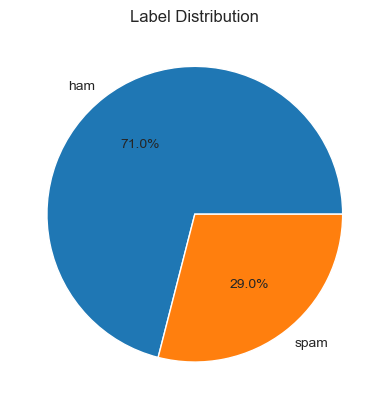

In [14]:
label_counts = df['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Label Distribution')
plt.show()

Here we find out that label column contains 71% of the ham mails and 29% of the spam mails.

In [15]:
#Drop unnecessary columns or feature
df = df.drop(columns=["Unnamed: 0", "label"])

In [16]:
df = df.reset_index(drop=True)

In [17]:
# Shape of the dataframe
df.shape

(5171, 2)

## Text Preprocessing
### (i) Remove Stopwords

Stopwords are common words like "the," "is," and "and" that are often removed from text data because they don't carry significant meaning for tasks like text analysis, text classification or natural language processing.

In [18]:
%%time
stop_words = set(stopwords.words('english')) 

df['text'] = df['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words]))

CPU times: total: 6.44 s
Wall time: 7.15 s


### (ii) Remove Special Characters, numbers, Convert text to lowercase, Do Stemming: -

In [22]:
# Function to clean and preprocess text
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Join the stemmed tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text

### (iii) Apply preprocess text into the dataframe column text.

In [23]:
# Apply the preprocess_text function to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Print the cleaned text
print(df['text'])

0       subject enron methanol meter follow note gave ...
1       subject hpl nom januari see attach file hplnol...
2       subject neon retreat ho ho ho around wonder ti...
3       subject photoshop window offic cheap main tren...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5166    subject put ft transport volum decreas contrac...
5167    subject follow nom hpl take extra mmcf weekend...
5168    subject calpin daili ga nomin juli mention ear...
5169    subject industri worksheet august activ attach...
5170    subject import onlin bank alert dear valu citi...
Name: text, Length: 5171, dtype: object


### First five rows of the dataframe after preprocessing or cleaning data.

In [24]:
df.head()

,text,label_num
0,subject enron methanol meter follow note gave ...,0
1,subject hpl nom januari see attach file hplnol...,0
2,subject neon retreat ho ho ho around wonder ti...,0
3,subject photoshop window offic cheap main tren...,1
4,subject indian spring deal book teco pvr reven...,0


### Distribution of data in the form of independent feature and the target feature.

In [25]:
X = df.loc[:, 'text']
y = df.loc[:, 'label_num']
print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (5171,)
shape of y: (5171,)


### Split the data in the training and testing data. 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

### Shape of the training and testing data.

In [27]:
print(f"Train Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Train Data Shape: (4136,)
Test Data Shape: (1035,)


### Count Vectorizer

CountVectorizer is a method used in natural language processing to convert a collection of text documents into a matrix of token counts. In simpler terms, it takes a bunch of text and turns it into numbers, counting how often certain words appear in each document.

In [28]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [29]:
X_train = X_train.toarray()

## Word Cloud for Spam and Ham Mails

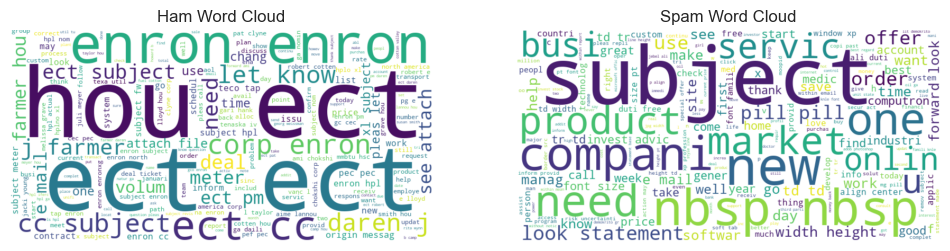

In [30]:
# Separate ham and spam emails
ham_emails = ' '.join(df[df['label_num'] == 0]['text'])
spam_emails = ' '.join(df[df['label_num'] == 1]['text'])

# Generate word clouds
ham_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(ham_emails)
spam_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(spam_emails)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.show()


Word Cloud gives common words or repeated words into the text. Here we find out that: -
Ham Mails contain  {ect, subject, hou, enron, farmer, subject, cc, corp, daren} whereas
Spam Mails contain {market, subject, compani, one, nbsp, onlin, one, new, compani, bill, width height, want, offer, order, look}.

## Used Machine Learning Algorithms: -

### (a) Logistic Regression
Logistic regression in text classification of emails is a statistical method used to model the relationship between the textual features of an email (such as word frequencies) and the probability that the email belongs to a particular category (spam or ham). It calculates the likelihood of an email being spam based on the features extracted from its text, allowing for binary classification into spam or ham categories.
### (b) Random Forest Classifier
Random Forest Classifier in text classification of emails is a machine learning algorithm that uses an ensemble of decision trees to classify emails into spam or ham categories. It works by constructing multiple decision trees during training and outputs the class that is the mode of the classes (classification) of the individual trees.
### (c) Decission Tree Classifier
Decision Tree Classifier in text classification of emails is a machine learning algorithm that uses a tree-like model of decisions to classify emails into spam or ham categories. It breaks down the email text into a series of questions based on the features (words or phrases) in the text, leading to a decision (spam or ham) at the end of the tree.
### (d) Naive Bayes

Naive Bayes in text classification of emails is a probabilistic machine learning algorithm that uses the Bayes theorem to predict the probability that a given email belongs to a particular category (spam or ham) based on the words or features present in the email. It assumes that the presence of each word in the email is independent of the presence of other words, which is why it's called "naive."

## Validation Technique/ Evaluation Technique
### (a) Accuracy Score: -
Accuracy score is a measure of how often a model's predictions are correct, calculated as the number of correct predictions divided by the total number of predictions.
### (b) Precision Value: -
Precision is a measure of how many correctly predicted positive instances (true positives) there are among all predicted positive instances, indicating the model's ability to avoid false positives.
### (c) Recall Value: -
Recall, also known as sensitivity or true positive rate, is a measure of how many correctly predicted positive instances (true positives) there are among all actual positive instances, indicating the model's ability to find all positive instances.
### (d) F-1 Score: -
The F-1 score is a single metric that combines both precision and recall into a single value. It is the harmonic mean of precision and recall, giving a balanced measure of a model's performance on both positive and negative classes.
### (e) Classification Report: -
A classification report is a summary of the performance of a classification model, showing metrics such as precision, recall, F1-score, and support for each class in the dataset. It helps in evaluating how well the model is performing for each class.
### (f) ROC Curve: -
The ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classification model. It shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) as the classification threshold is varied.

## (a) Logistic Regression 
### Fit the model

In [31]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

### Prediction of the model on training data and their outcomes: -

accuracy_score of train data 0.999274661508704 



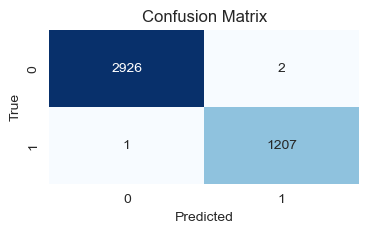

classification_report of train data
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2928
           1       1.00      1.00      1.00      1208

    accuracy                           1.00      4136
   macro avg       1.00      1.00      1.00      4136
weighted avg       1.00      1.00      1.00      4136



In [32]:
y_pred = LR.predict(X_train)

LR_accuracy_train = acscore(y_train,y_pred)
print("accuracy_score of train data", LR_accuracy_train,"\n")

cmm = cm(y_train,y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cmm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

classification_report = cr(y_train,y_pred)
print("classification_report of train data\n","\n", classification_report)

### Prediction of the model on test data and their outcomes: -

accuracy_score of test data 0.978743961352657 



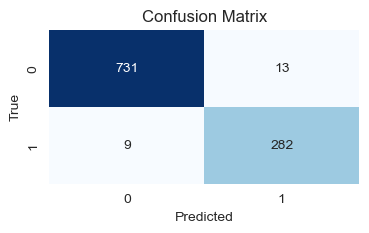

classification_report of test data
 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       744
           1       0.96      0.97      0.96       291

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035



In [33]:
y_prred = LR.predict(X_test)

LR_accuracy_test = acscore(y_test,y_prred)
print("accuracy_score of test data", LR_accuracy_test,"\n")

cmm = cm(y_test, y_prred)
plt.figure(figsize=(4, 2))
sns.heatmap(cmm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

classification_report = cr(y_test,y_prred)
print("classification_report of test data\n","\n", classification_report)

## (b) Random Forest Classifier
### Fit the model

In [34]:
RFC = RandomForestClassifier(n_estimators = 100, random_state = 42)
RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Prediction of the model on training data and their outcomes: -

accuracy_score of train data 1.0 



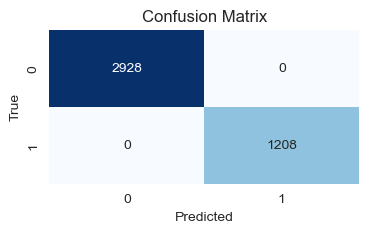

classification_report of train data
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2928
           1       1.00      1.00      1.00      1208

    accuracy                           1.00      4136
   macro avg       1.00      1.00      1.00      4136
weighted avg       1.00      1.00      1.00      4136



In [35]:
y_predd = RFC.predict(X_train)

RFC_accuracy_train = acscore(y_train,y_predd)
print("accuracy_score of train data", RFC_accuracy_train,"\n")

cmm = cm(y_train, y_predd)
plt.figure(figsize=(4, 2))
sns.heatmap(cmm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

classification_report = cr(y_train,y_predd)
print("classification_report of train data\n","\n", classification_report)

### Prediction of the model on test data and their outcomes: -

accuracy_score of test data 0.9729468599033816 



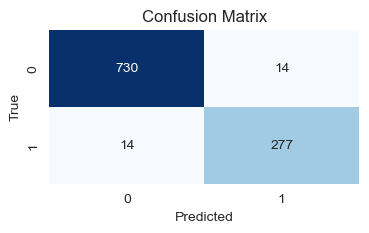

classification_report of test data
 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       744
           1       0.95      0.95      0.95       291

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [36]:
y_preed = RFC.predict(X_test)

RFC_test_accuracy = acscore(y_test,y_preed)
print("accuracy_score of test data", RFC_test_accuracy,"\n")

cmm = cm(y_test, y_preed)
plt.figure(figsize=(4, 2))
sns.heatmap(cmm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

classification_report = cr(y_test,y_preed)
print("classification_report of test data\n","\n", classification_report)

## (c) Decission Tree Classifier
### Fit the model

In [37]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

### Prediction of the model on training data and their outcomes: -

accuracy_score of train data 1.0 



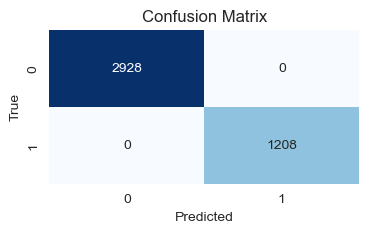

classification_report of train data
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2928
           1       1.00      1.00      1.00      1208

    accuracy                           1.00      4136
   macro avg       1.00      1.00      1.00      4136
weighted avg       1.00      1.00      1.00      4136



In [38]:
y_12 = DTC.predict(X_train)

DTC_accuracy_train = acscore(y_train,y_12)
print("accuracy_score of train data", DTC_accuracy_train,"\n")

cmm = cm(y_train, y_12)
plt.figure(figsize=(4, 2))
sns.heatmap(cmm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

classification_report = cr(y_train,y_12)
print("classification_report of train data\n","\n", classification_report)

### Prediction of the model on test data and their outcomes: -

accuracy_score of test data 0.9545893719806763 



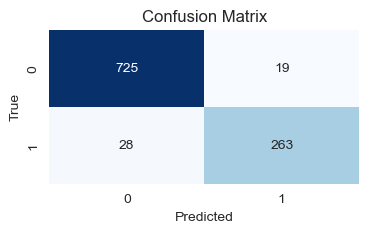

classification_report of test data
 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       744
           1       0.93      0.90      0.92       291

    accuracy                           0.95      1035
   macro avg       0.95      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



In [39]:
y_122 = DTC.predict(X_test)

DTC_test_accuracy = acscore(y_test,y_122)
print("accuracy_score of test data", DTC_test_accuracy,"\n")

cmm = cm(y_test, y_122)
plt.figure(figsize=(4, 2))
sns.heatmap(cmm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

classification_report = cr(y_test,y_122)
print("classification_report of test data\n","\n", classification_report)

## (d) Naive Bayes
### Fit the model

In [40]:
# Fit the model
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

### Prediction of the model on training data and their outcomes: -

accuracy_score of train data 0.9850096711798839 



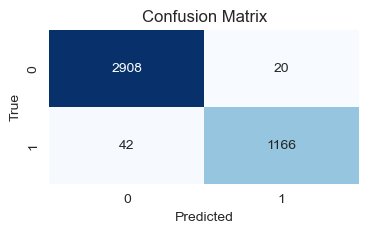

classification_report of train data
 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2928
           1       0.98      0.97      0.97      1208

    accuracy                           0.99      4136
   macro avg       0.98      0.98      0.98      4136
weighted avg       0.98      0.99      0.98      4136



In [41]:
yy_12 = nb.predict(X_train)

nb_accuracy_train = acscore(y_train,yy_12)
print("accuracy_score of train data", nb_accuracy_train,"\n")

cmm = cm(y_train, yy_12)
plt.figure(figsize=(4, 2))
sns.heatmap(cmm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

classification_report = cr(y_train,yy_12)
print("classification_report of train data\n","\n", classification_report)

### Prediction of the model on test Data and their outcomes: -

accuracy_score of test data 0.9710144927536232 



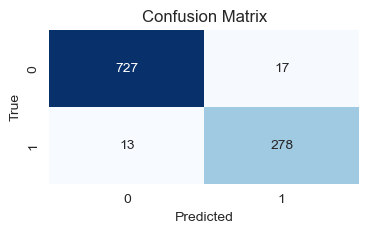

classification_report of test data
 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       744
           1       0.94      0.96      0.95       291

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [42]:
yy_122 = nb.predict(X_test)

nb_test_accuracy = acscore(y_test,yy_122)
print("accuracy_score of test data", nb_test_accuracy,"\n")

cmm = cm(y_test, yy_122)
plt.figure(figsize=(4, 2))
sns.heatmap(cmm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

classification_report = cr(y_test,yy_122)
print("classification_report of test data\n","\n", classification_report)

### Compare accuracy of the models apply above,

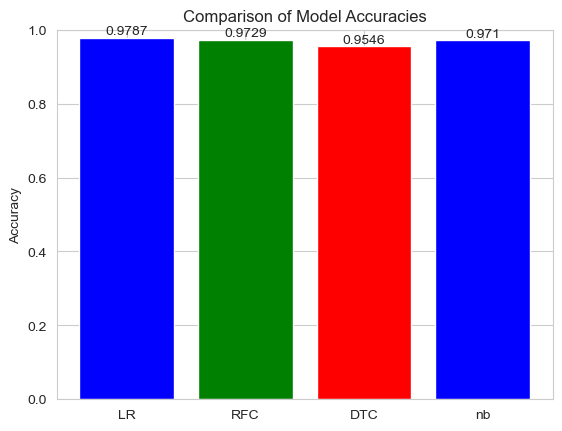

In [43]:
models = ['LR','RFC','DTC','nb']
accuracies = [LR_accuracy_test, RFC_test_accuracy, DTC_test_accuracy, nb_test_accuracy]

# Plotting the bar chart
fig, ax = plt.subplots()
bars = ax.bar(models, accuracies, color=['blue', 'green', 'red'])

# Adding the accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.ylim([0, 1])  
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


* From the above graph, we find that Logistic Regression, Random Forest Classifier and nb gives high accuracy approximately equal to 97%.
* As our problem is a classification problem, So we don't have to focus only on accuracy with this we also have to focus on F-1 Score (Precission and Recall). 

#### From the above finding, we conclude that Logistic Regression gives high Precision value, high F-1 Score and high accuracy of 97.87 % as compare to all other algorithms. 

### ROC Curve of Logistic Regression 

The ROC (Receiver Operating Characteristic) curve for Logistic Regression shows how well the model can distinguish between classes (e.g., spam and ham emails). It plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different threshold values. A higher ROC curve means the model is better at distinguishing between the classes, with the ideal scenario being a curve that hugs the top left corner, indicating high sensitivity and low false positive rate.

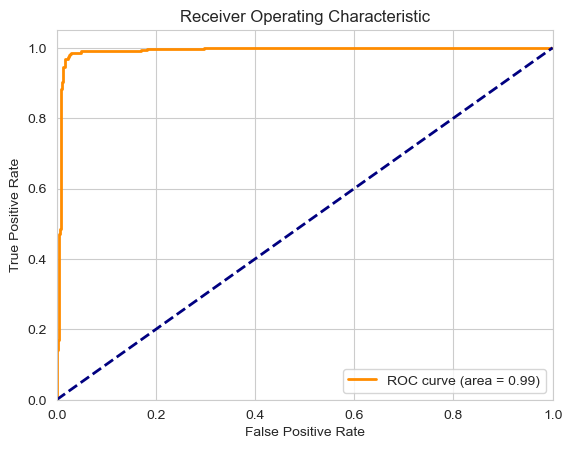

In [44]:
y_scores = LR.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Conclusion
Logistic Regression is our final model because it gives high accuracy, high precision value with smooth upward trajectory of ROC Curve.

### Purpose of the E-Mail Classification Project: -

This model helps detect and filter out spam, fraud, and legitimate (ham) emails, protecting us from cyber attackers and scammers who try to deceive or defraud us through email communication.